# Gradient Descent Variants – RMSprop & Adam
This notebook demonstrates implementations of RMSprop and Adam optimizers on a simple quadratic function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Define Sample Quadratic Function and Gradient
We use $L(w) = (w-3)^2$, with gradient $dL/dw = 2(w-3)$.

In [2]:
def loss(w):
    return (w - 3) ** 2

def grad_loss(w):
    return 2 * (w - 3)

## 2. RMSprop Implementation

In [3]:
# RMSprop parameters
alpha = 0.1  # learning rate
gamma = 0.9  # decay rate
epsilon = 1e-8
w_rms = 0.0  # initial value
s = 0.0      # running average of squared gradients
iterations = 50

# Store values for plotting
w_rms_history = []
loss_rms_history = []

for t in range(1, iterations + 1):
    grad = grad_loss(w_rms)
    s = gamma * s + (1 - gamma) * grad**2
    w_rms -= alpha / (np.sqrt(s) + epsilon) * grad
    w_rms_history.append(w_rms)
    loss_rms_history.append(loss(w_rms))

# Print final value
print(f"RMSprop final w: {w_rms:.4f}, loss: {loss_rms_history[-1]:.4f}")

RMSprop final w: 2.9975, loss: 0.0000


### Plot RMSprop Convergence

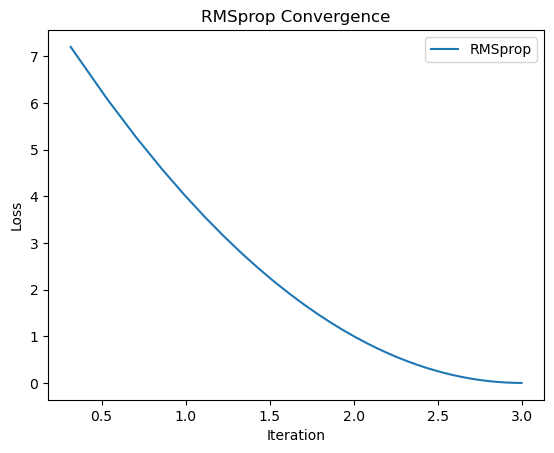

In [4]:
plt.plot(w_rms_history, loss_rms_history, label='RMSprop')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('RMSprop Convergence')
plt.legend()
plt.show()

## 3. Adam Implementation

In [5]:
# Adam parameters
alpha = 0.1   # learning rate
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
w_adam = 0.0  # initial value
m = 0.0       # first moment
v = 0.0       # second moment

w_adam_history = []
loss_adam_history = []

for t in range(1, iterations + 1):
    grad = grad_loss(w_adam)
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * (grad**2)
    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)
    w_adam -= alpha * m_hat / (np.sqrt(v_hat) + epsilon)
    w_adam_history.append(w_adam)
    loss_adam_history.append(loss(w_adam))

# Print final value
print(f"Adam final w: {w_adam:.4f}, loss: {loss_adam_history[-1]:.4f}")

Adam final w: 3.1689, loss: 0.0285


### Plot Adam Convergence

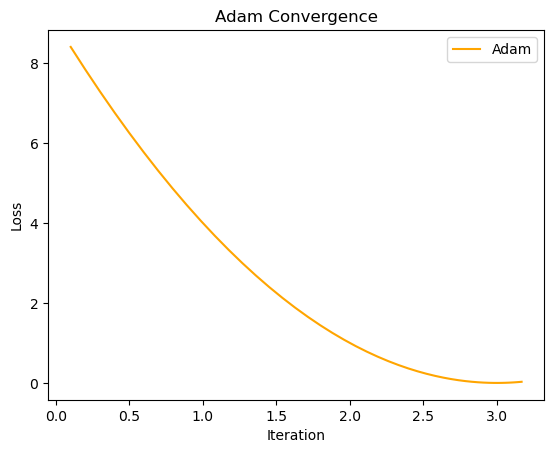

In [6]:
plt.plot(w_adam_history, loss_adam_history, label='Adam', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Adam Convergence')
plt.legend()
plt.show()

## 4. Comparison Plot

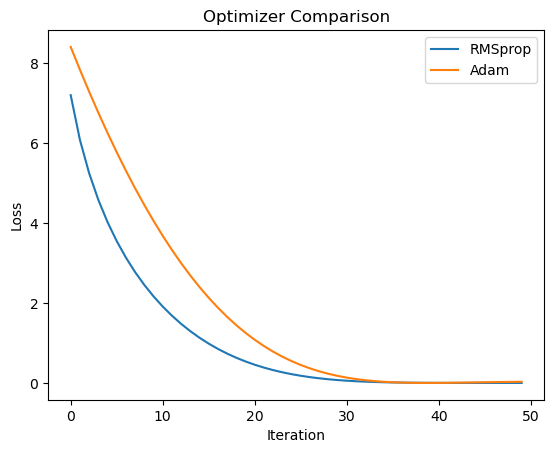

In [7]:
plt.plot(loss_rms_history, label='RMSprop')
plt.plot(loss_adam_history, label='Adam')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Optimizer Comparison')
plt.legend()
plt.show()